In [23]:
#import all the necessary library

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


To analyze YouTube channel data, we first need to connect to the YouTube API.

Using the googleapiclient.discovery module, we can access various resources provided by YouTube.

The api_key is required to authenticate our requests and gain access to the data we need for our analysis.

By building a YouTube API client, we can retrieve detailed information about channels, such as subscriber count, view count, and more, which will be crucial for our subsequent analysis.

In [24]:
#authenticate application using API key. 

from googleapiclient.discovery import build

api_key = "XXXXXXX" # replace with your key

youtube = build('youtube', 'v3', developerKey=api_key)  #creating service object by calling build() fucntion

We define a function search_channels which uses the YouTube API to perform a search and retrieve a list of channels
that match the query.

We search for channels related to "data analyst" and specify a maximum of 50 results.

The part parameter is set to 'snippet' to retrieve basic details about the channels, such as their titles and IDs.
After executing the search, we print the titles and IDs of the channels found.

In [25]:

def search_channels(query, max_results=50):
    request = youtube.search().list(
        q=query,
        part='snippet',
        type='channel',
        maxResults=max_results
    )
    response = request.execute()
    return response

# Search for channels related to data analysis
data_analysis_channels = search_channels('data analyst')

# Print the channel titles and IDs
for item in data_analysis_channels['items']:
    print(item['snippet']['title'], item['id']['channelId'])


Alex The Analyst UC7cs8q-gJRlGwj4A8OmCmXg
Luke Barousse UCLLw7jmFsvfIVaUFsLs8mlQ
Thu Vu data analytics UCJQJAI7IjbLcpsjWdSzYz0Q
Agatha UCU-aPpP8BxAd4mDoP0OL4jQ
Maz Học Data UCClTa_jbo8yksWrtJJBejVw
Ali Ahmad UCaDh-eU-lds_d9kS976vBVw
Data Analyst In Companies UC4lk3jMRUxavSq1tm_tU34w
Stefanovic UC0GmdVKZhMM3Rmielp4oVAA
Decoding Data Analytics UCq1Y7zxoY6ilbEJv-sATzzQ
Mastering Data Analytics UCZAXaOgno-rYM4ubRzOyfvA
Bhargavi - Data Analyst UCto9iONQdirtQUlfYeUyknw
Colaberry School Of Data Analytics UCb23caPCK7xW8roOkr_iKRA
Chandoo UC8uU_wruBMHeeRma49dtZKA
Stock Data Analysis UCzp6RKEj8OzB8er0_o1weoQ
codebasics UCh9nVJoWXmFb7sLApWGcLPQ
Hariharan S UC5ZV0c4Lmv1MfuXETQ7lMQg
Ryan Nolan Data UCKq-lHnyradGRmFClX_ACMw
DataSense Analytics UC_OqR509FLKnn0rL6C4pl1w
Xplore Data with Us UCC8JMQ1oTQVdADBfaJPn2rQ
Matt Mike UC_tgXLfHYVXFIe-8c4cRUNQ
Maven Analytics UCFqInmJykuVFKzi6uQl_ySg
mohamed abdulatty UC1z3FSemiKI_JO6Fmz1k9EQ
Sundas Khalid UCteRPiisgIoHtMgqHegpWAQ
Top VarSity UCV2On_SjdqwEG9NyEHQ

In [26]:
def get_channel_statistics(channel_id):
    request = youtube.channels().list(
        part='statistics',
        id=channel_id
    )
    response = request.execute()
    return response

# For each channel, it extracts the channelId and calls the get_channel_statistics function to retrieve statistics.

channel_statistics = {}
for item in data_analysis_channels['items']:
    channel_id = item['id']['channelId']
    channel_name = item['snippet']['title']  # Retrieve channel name
    creation_date = item['snippet']['publishedAt']  # Retrieve creation date
    statistics = get_channel_statistics(channel_id)
    channel_statistics[channel_id] = {
        'name': channel_name,
        'creation_date': creation_date,
        'statistics': statistics['items'][0]['statistics']
    }


# Print the statistics for each channel
for channel_id, data in channel_statistics.items():
    channel_name = data['name']
    creation_date = data['creation_date']
    stats = data['statistics']
    
    print("Channel Name:", channel_name)
    print("Channel ID:", channel_id)
    print("Creation Date:", creation_date)
    print("Subscriber Count:", stats.get('subscriberCount', 'N/A'))
    print("View Count:", stats.get('viewCount', 'N/A'))
    print("Video Count:", stats.get('videoCount', 'N/A'))
    print()



Channel Name: Alex The Analyst
Channel ID: UC7cs8q-gJRlGwj4A8OmCmXg
Creation Date: 2020-01-08T05:04:24Z
Subscriber Count: 791000
View Count: 35220047
Video Count: 307

Channel Name: Luke Barousse
Channel ID: UCLLw7jmFsvfIVaUFsLs8mlQ
Creation Date: 2020-08-03T09:02:41Z
Subscriber Count: 441000
View Count: 22087997
Video Count: 158

Channel Name: Thu Vu data analytics
Channel ID: UCJQJAI7IjbLcpsjWdSzYz0Q
Creation Date: 2021-04-30T15:22:58Z
Subscriber Count: 233000
View Count: 7840909
Video Count: 86

Channel Name: Agatha
Channel ID: UCU-aPpP8BxAd4mDoP0OL4jQ
Creation Date: 2023-08-18T12:16:57Z
Subscriber Count: 22700
View Count: 888967
Video Count: 45

Channel Name: Maz Học Data
Channel ID: UCClTa_jbo8yksWrtJJBejVw
Creation Date: 2022-12-02T03:05:10Z
Subscriber Count: 62100
View Count: 1679439
Video Count: 36

Channel Name: Ali Ahmad
Channel ID: UCaDh-eU-lds_d9kS976vBVw
Creation Date: 2019-10-19T16:50:36Z
Subscriber Count: 19200
View Count: 813926
Video Count: 58

Channel Name: Data Analy

We create a list to store detailed channel dat and after collecting data for all channels, we convert this list 
into a pandas DataFrame, channel_df, which provides a structured and convenient way to analyze the channel metrics.

In [27]:
# Create a list to store channel data
channel_data = []

# Populate the list with channel data
for channel_id, data in channel_statistics.items():
    channel_name = data['name']
    creation_date = data['creation_date']
    stats = data['statistics']
    subscriber_count = stats.get('subscriberCount', 'N/A')
    view_count = stats.get('viewCount', 'N/A')
    video_count = stats.get('videoCount', 'N/A')
    
    channel_data.append({
        'Channel Name': channel_name,
        'Channel ID': channel_id,
        'Creation Date': creation_date,
        'Subscriber Count': subscriber_count,
        'View Count': view_count,
        'Video Count': video_count
    })

# Create a DataFrame from the list
channel_df = pd.DataFrame(channel_data)

# Display the DataFrame
channel_df.head()

,Channel Name,Channel ID,Creation Date,Subscriber Count,View Count,Video Count
0,Alex The Analyst,UC7cs8q-gJRlGwj4A8OmCmXg,2020-01-08T05:04:24Z,791000,35220047,307
1,Luke Barousse,UCLLw7jmFsvfIVaUFsLs8mlQ,2020-08-03T09:02:41Z,441000,22087997,158
2,Thu Vu data analytics,UCJQJAI7IjbLcpsjWdSzYz0Q,2021-04-30T15:22:58Z,233000,7840909,86
3,Agatha,UCU-aPpP8BxAd4mDoP0OL4jQ,2023-08-18T12:16:57Z,22700,888967,45
4,Maz Học Data,UCClTa_jbo8yksWrtJJBejVw,2022-12-02T03:05:10Z,62100,1679439,36


In [28]:
# Extract date part of the Creation date column, discarding any time information

channel_df['Creation Date']= pd.to_datetime(channel_df['Creation Date'])

channel_df['Creation Date'] = channel_df['Creation Date'].dt.date

channel_df.head()

,Channel Name,Channel ID,Creation Date,Subscriber Count,View Count,Video Count
0,Alex The Analyst,UC7cs8q-gJRlGwj4A8OmCmXg,2020-01-08,791000,35220047,307
1,Luke Barousse,UCLLw7jmFsvfIVaUFsLs8mlQ,2020-08-03,441000,22087997,158
2,Thu Vu data analytics,UCJQJAI7IjbLcpsjWdSzYz0Q,2021-04-30,233000,7840909,86
3,Agatha,UCU-aPpP8BxAd4mDoP0OL4jQ,2023-08-18,22700,888967,45
4,Maz Học Data,UCClTa_jbo8yksWrtJJBejVw,2022-12-02,62100,1679439,36


In [29]:
# Checking for null values in any column

channel_df.isnull().sum()

Channel Name        0
Channel ID          0
Creation Date       0
Subscriber Count    0
View Count          0
Video Count         0
dtype: int64

We take the numeric column columns , convert them into proper format.
we compute and display descriptive statistics for these columns to help us understand the distribution and summary 
statistics of the data.

In [30]:
channel_df[["Subscriber Count", "View Count", "Video Count"]] =channel_df[["Subscriber Count", "View Count", "Video Count"]].apply(pd.to_numeric) 

Num_columns= channel_df[["Subscriber Count", "View Count", "Video Count"]] 

Num_columns.describe()

,Subscriber Count,View Count,Video Count
count,5.000000e+01,5.000000e+01,50.000000
mean,1.094618e+05,6.218236e+06,174.140000
std,2.097938e+05,1.472641e+07,197.348651
min,3.600000e+01,1.445000e+03,2.000000
25%,2.532500e+03,7.234775e+04,45.500000
50%,1.115000e+04,3.608630e+05,87.000000
75%,1.412500e+05,6.807573e+06,261.250000
max,1.030000e+06,8.527640e+07,875.000000


We compute the correlation matrix for numerical variables. This matrix helps us understand the relationships 
between different variables.



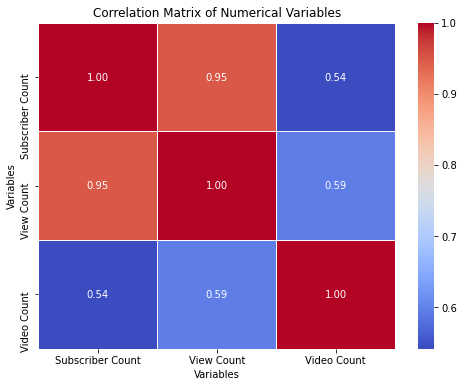

In [31]:
# Calculate the correlation matrix

correlation_matrix = Num_columns.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Numerical Variables')
plt.xlabel('Variables')
plt.ylabel('Variables')
plt.show()

To gain insights into channel performance and audience engagement, we begin by identifying the top 10 channels based on subscriber count, view count, and video count. This allows us to understand which channels are most popular, viewed, and prolific in terms of content creation.

Utilizing the sns.barplot() function from the Seaborn library, we create bar plots to visualize the top channels across these metrics.



In [32]:
# Top 10 channel , in terms of subscriber, count, views of videos

top10_subscribed= channel_df.sort_values(by="Subscriber Count", ascending = False).head(10)
top10_viewed= channel_df.sort_values(by="View Count", ascending = False).head(10)
top10_videos_count= channel_df.sort_values(by="Video Count", ascending = False).head(10)

Note:

YouTube creators often include tags and metadata (e.g., keywords, categories) when uploading videos to help them 
appear in relevant search results or Channel Description or About Section therefore code basics on first, actually  this channel teaches everything

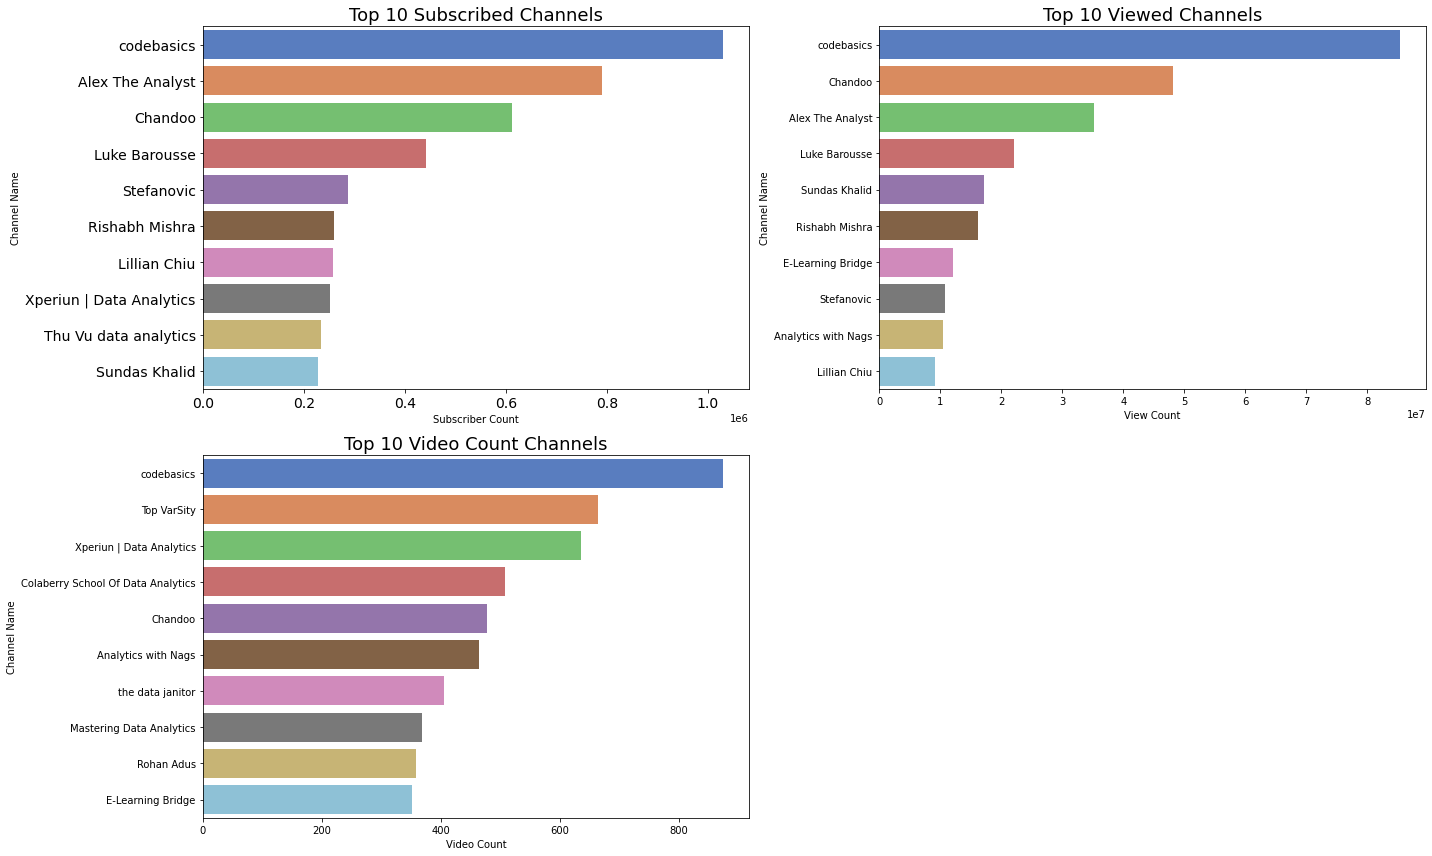

In [33]:

#Creating plots

fig, axes = plt.subplots(2, 2, figsize=(20, 12))


# Plot for top 10 subscribed channels
sns.barplot(x='Subscriber Count', y='Channel Name', data=top10_subscribed, ax=axes[0, 0], palette='muted')
axes[0, 0].set_title('Top 10 Subscribed Channels', fontsize=18)
axes[0, 0].tick_params(axis='both', which='major', labelsize=14)

# Plot for top 10 viewed channels
sns.barplot(x='View Count', y='Channel Name', data=top10_viewed, ax=axes[0, 1], palette='muted')
axes[0, 1].set_title('Top 10 Viewed Channels', fontsize=18)
axes[0, 0].tick_params(axis='both', which='major', labelsize=14)

# Plot for top 10 video count channels, spanning both columns in the second row
sns.barplot(x='Video Count', y='Channel Name', data=top10_videos_count, ax=axes[1, 0], palette='muted')
axes[1, 0].set_title('Top 10 Video Count Channels', fontsize=18)
axes[0, 0].tick_params(axis='both', which='major', labelsize=14)

# Remove the unused subplot in the second row, second column
fig.delaxes(axes[1, 1])

# Adjust layout for better readability
plt.tight_layout()

# Show plots
plt.show()


Engazement metrics

In [34]:
# Calculate average views per video for each channel
channel_df['Avg Views per Video'] = (channel_df['View Count'] / channel_df['Video Count']).round(2)

# Calculate average views per subscriber for each channel
channel_df['Avg Views per Subscriber'] = (channel_df['View Count'] / channel_df['Subscriber Count']).round(2)
channel_df.head()

,Channel Name,Channel ID,Creation Date,Subscriber Count,View Count,Video Count,Avg Views per Video,Avg Views per Subscriber
0,Alex The Analyst,UC7cs8q-gJRlGwj4A8OmCmXg,2020-01-08,791000,35220047,307,114723.28,44.53
1,Luke Barousse,UCLLw7jmFsvfIVaUFsLs8mlQ,2020-08-03,441000,22087997,158,139797.45,50.09
2,Thu Vu data analytics,UCJQJAI7IjbLcpsjWdSzYz0Q,2021-04-30,233000,7840909,86,91173.36,33.65
3,Agatha,UCU-aPpP8BxAd4mDoP0OL4jQ,2023-08-18,22700,888967,45,19754.82,39.16
4,Maz Học Data,UCClTa_jbo8yksWrtJJBejVw,2022-12-02,62100,1679439,36,46651.08,27.04


Analyzing Engagement Metrics

To assess audience engagement with YouTube channels, we calculate two key metrics: average views per video and 
average views per subscriber.

We then create visualizations to identify the top 10 channels based on these engagement metrics.

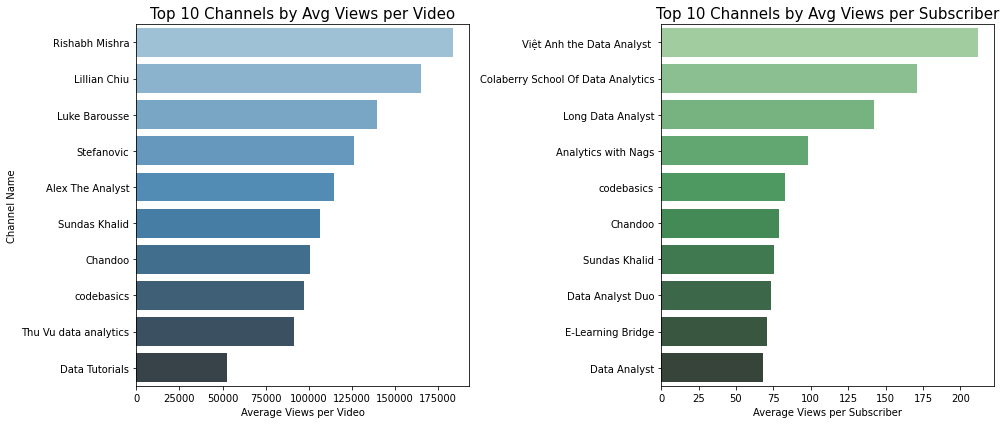

In [35]:


# Create a 1x2 grid layout for the plots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot for top 10 channels by average views per video
sns.barplot(x='Avg Views per Video', y='Channel Name', data=channel_df.nlargest(10, 'Avg Views per Video'), ax=axes[0], palette='Blues_d')
axes[0].set_title('Top 10 Channels by Avg Views per Video', fontsize=15)
axes[0].set_xlabel('Average Views per Video')
axes[0].set_ylabel('Channel Name')

# Plot for top 10 channels by average views per subscriber
sns.barplot(x='Avg Views per Subscriber', y='Channel Name', data=channel_df.nlargest(10, 'Avg Views per Subscriber'), ax=axes[1], palette='Greens_d')
axes[1].set_title('Top 10 Channels by Avg Views per Subscriber', fontsize=15)
axes[1].set_xlabel('Average Views per Subscriber')
axes[1].set_ylabel('')

# Adjust layout
plt.tight_layout()

# Show plots
plt.show()


Segmenting Channels by Size

To segment the channels based on their subscriber count, we first calculate the 33rd and 66th percentiles of the 
subscriber count distribution. These percentiles serve as cutoff points for defining three segments: small, medium,
and large channels.

We add a new column to the dataframe, named "Segment," to store the segmentation results.This allows for the 
analysis and comparison of channels based on their size, enabling targeted strategies for content creation, promotion, and audience engagement.


In [36]:
# creating segments as per count of subscribers

# Calculate the 33rd and 66th percentiles
quantiles = channel_df['Subscriber Count'].quantile([0.33, 0.66])
low_cutoff = quantiles[0.33]
high_cutoff = quantiles[0.66]

print("Low Cutoff:", low_cutoff)
print("High Cutoff:", high_cutoff)


# Define a function to segment the channels
def segment_channel(row):
    if row['Subscriber Count'] < low_cutoff:
        return 'Small'
    elif row['Subscriber Count'] < high_cutoff:
        return 'Medium'
    else:
        return 'Large'

# Add a new column for segments
channel_df['Segment'] = channel_df.apply(segment_channel, axis=1)

# Verify the segments
print(channel_df['Segment'].value_counts())



Low Cutoff: 3739.5000000000005
High Cutoff: 47250.00000000007
Segment
Large     17
Small     17
Medium    16
Name: count, dtype: int64


In [37]:
channel_df.tail()

,Channel Name,Channel ID,Creation Date,Subscriber Count,View Count,Video Count,Avg Views per Video,Avg Views per Subscriber,Segment
45,Vipul Gupta,UCK_5-Ii-M9aI6Ase7xIWpUQ,2012-07-04,1230,69634,98,710.55,56.61,Small
46,Rohan Adus,UCQiNyL7ik4FIlV2UCvojq0g,2020-03-23,15200,770931,358,2153.44,50.72,Medium
47,Shakra Shamim,UCQhpnItclGAUn4NdGGcEyPQ,2023-02-26,14700,325201,14,23228.64,22.12,Medium
48,Junaid Ahmed,UCsFhEyzRQ0LLFgFkCqevCsw,2016-12-18,2630,80489,47,1712.53,30.60,Small
49,Rishabh Mishra,UC3rY5HOgbBvGmq7RnDfwF7A,2022-02-12,259000,16160067,88,183637.12,62.39,Large


Visualizing Subscriber Growth Over Time by Segment

we first sort the channels within each segment by their creation date. This ensures that channels are plotted in 
chronological order.

Next, we create a line plot to visualize the subscriber count over the creation date for each segment. This allows
us to observe how subscriber counts have evolved over time for small, medium, and large channels.

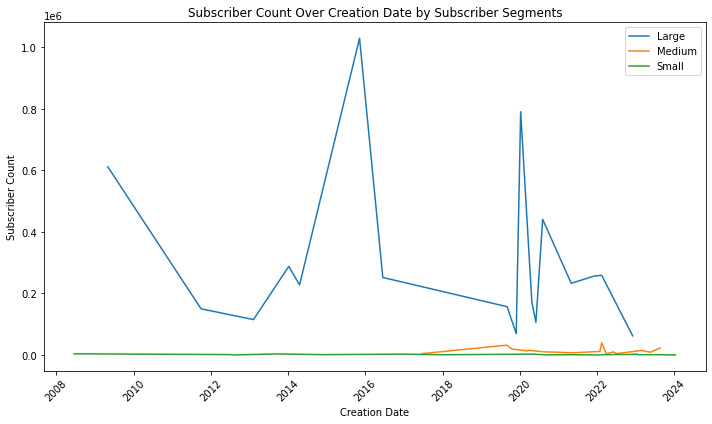

In [38]:

# Sort channels within each segment by creation date
sorted_channel_df = channel_df.sort_values(by='Creation Date')

# Create line plot for subscriber count over creation date for each segment
plt.figure(figsize=(10, 6))
for segment, df in sorted_channel_df.groupby('Segment'):
    plt.plot(df['Creation Date'], df['Subscriber Count'], label=segment)

# Customize plot
plt.xlabel('Creation Date')
plt.ylabel('Subscriber Count')
plt.title('Subscriber Count Over Creation Date by Subscriber Segments')
plt.legend()
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show plot
plt.tight_layout()
plt.show()


To understand the distribution of channel ages across different segments, we first calculate the age of each 
channel in days. 

The box plot provides insights into the central tendency, spread, and variability of channel ages within each 
segment. It allows us to identify potential differences or similarities in the age distribution across segments.

In [ ]:


# Calculate channel age
channel_df['Creation Date'] = pd.to_datetime(channel_df['Creation Date'])  # Convert creation date to datetime
channel_df['Channel Age'] = (pd.Timestamp.now() - channel_df['Creation Date']).dt.days  # Calculate age in days

# Set the style of the visualization
sns.set(style="whitegrid")

# Create a figure and axis for the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the distribution of channel ages by segment
sns.boxplot(data=channel_df, x='Segment', y='Channel Age', ax=ax, palette='Set3')

# Set the title and labels
ax.set_title('Distribution of Channel Ages by Segment')
ax.set_xlabel('Segment')
ax.set_ylabel('Channel Age (Days)')

# Show plot
plt.tight_layout()
plt.show()


In conclusion, our analysis of YouTube channel data provides valuable insights into audience engagement, channel growth, and segmentation. Essentially, it reveals the popularity of YouTube channels focused on data analysis learning.